# Olympic Medal Predictions
## Machine Learning: Linear Regression

Augustinus Joseph

2023-10-27

## Hypothesis

We can predict how many medals a country will win at the olympics by using historical data.

## The Data
Originally from Kaggle, I accessed a dataset of how many medals each country won at each Olympics. [Download here](https://github.com/dataquestio/project-walkthroughs/tree/master/beginner_ml#data)

Other data would also be nice (most recent statistics, olympic type, etc).

In [1]:
# Do any necessary installs of libraries and packages

# !pip install pandas
# !pip install scikit-learn
# !pip install seaborn
# !pip install matplotlib
# !pip install numpy

In [2]:
# Import pandas library
import pandas as pd

#Import numpy library
import numpy as np

#import scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#Import seaborn
import seaborn as sns

#Import matplotlib
import matplotlib.pyplot as plt

## Predictive Model Development
#### Model 1

In [3]:
teams = pd.read_csv("teams.csv")

In [4]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [5]:
tteams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [6]:
tteams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [7]:
tteams.corr(numeric_only=True)["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

C:\Users\allah\anaconda3\envs\fst_ml_envi\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


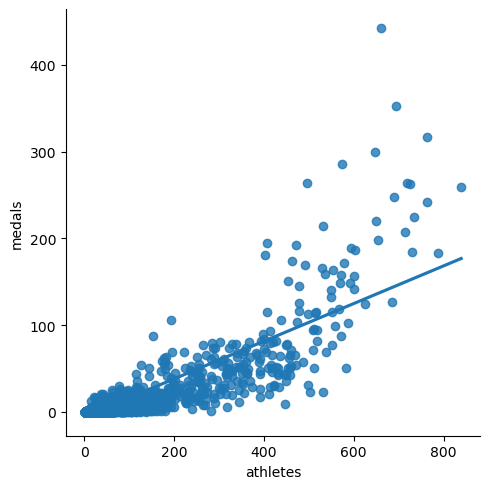

In [8]:
sns.lmplot(x='athletes', y='medals', data=tteams, fit_reg=True, ci=None)

In this plot, we can see a rough linear correlation between athletes and medals. Common sense tells us more athletes means more chances to win medals, but here is a visual representation of the quantified theory.

<Axes: ylabel='Frequency'>

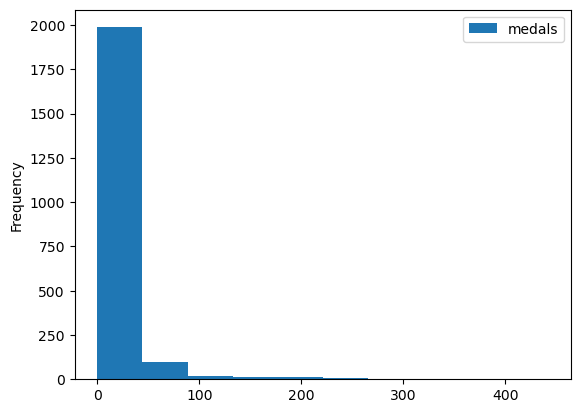

In [9]:
tteams.plot.hist(y="medals")

This histogram shows us that our data is a bit unbalanced; the majority of countries have earned between 0 and 50 medals whereas very few countries have earned a lot of medals. This may impact the usefulness of our model and our accuracy, but we will make adjustments to the model to create a model that is as accurate as possible.


### Data Cleaning 
#### finding missing values

In [10]:
tteams[tteams.isnull().any(axis=1)].head(20)


,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
82,ARM,Armenia,1996,38,24.0,NaN,2
88,ARU,Aruba,1988,12,27.8,NaN,0
96,ASA,American Samoa,1988,6,27.0,NaN,0
131,AZE,Azerbaijan,1996,24,25.1,NaN,1
150,BAN,Bangladesh,1984,2,21.0,NaN,0


In [11]:
dteams = tteams.dropna()

In [12]:
dteams.shape

(2014, 7)

### Data Training
#### split the data

In [13]:
train = dteams[dteams["year"] < 2012].copy()
test = dteams[dteams["year"] >= 2012].copy()

In [14]:
# About 80% of the data
train.shape

(1609, 7)

In [15]:
# About 20% of the data
test.shape

(405, 7)

## Accuracy Metric

We'll use MAE (mean absolute error) as the error metric we're to evaluate our model after we train fit. 

As the goal is to predict how many medals we think a country should have earned in a given Olympics, the predictions are going to be different than the actual count, so we're going to test different prediction models to find out which model is most accurate.

In [16]:
reg = LinearRegression()

In [17]:
# Create the predictors
predictors = ["athletes", "prev_medals"]
target = "medals"

In [18]:
# Fit the predictors
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [19]:
predictions = reg.predict(test[predictors])

In [20]:
predictions.shape

(405,)

In [21]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

These values are not rounded, and some of these values are negative. Countries can't receive a negative number of medals or partial values. So, we are going to manually correct/rescale our predictions. 

In [22]:
test["predictions"] = predictions

Let's take a better look at our predictions.

In [23]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [24]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [25]:
test["predictions"] = test["predictions"].round()

Check prediction values to make sure they are rounded.

In [26]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


### Accuracy Metric

We'll use MAE because it's a good default regression accuracy metric. 

In [27]:
error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2987654320987656

Check that our error is below the standard deviation.

In [28]:
dteams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [29]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [30]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


The two examples above are used to determine how far our MAE is on a percentage basis.

In [31]:
errors = (test["medals"] - test["predictions"]).abs()

In [32]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

The chart above is showing the difference in our predicted number vs actual number of medals earned by each team.

In [33]:
error_by_team = errors.groupby(test["team"]).mean()

We'll use the code above to group each team and find the mean error by team.

In [34]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

Now, we can see how many medals we were off (on average) for each country.

In [35]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

We can use this code to see how many medals each country earned on average.

In [36]:
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

Next, we'll find the ratio between our errors.

In [37]:
error_ratio =  error_by_team / medals_by_team 

In [38]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

NaN vaules are present because a lot of teams earned 0 medals; dividing with zero produces a missing value. Let's fix that.

In [39]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

The code above eliminates countries with missing values. Be mindful, that the elimination only presents half of the countries we are examining. With the equation we set up, some of the countries appear with an infinite value; for example, dividing error_by_team being 1 over medals_by_team being zero. So let's fix that as well.

In [40]:
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [41]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

Now we only have 97 rows. We've removed missing and infinite values. So now, we are only working with rows we have an error ratio for. Let's make a new histogram using these specific values.

<Axes: ylabel='Frequency'>

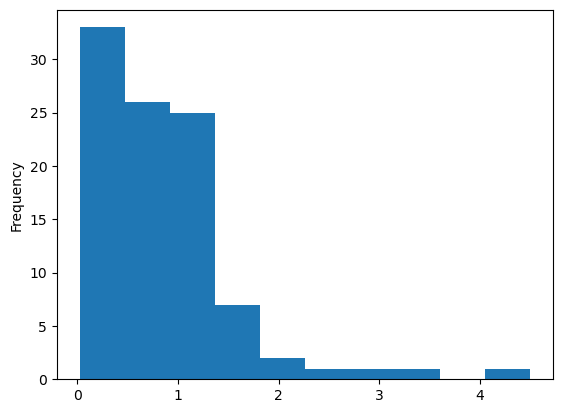

In [42]:
error_ratio.plot.hist()

In [43]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

For countries that tend to get a lot of medals in the Olympics, our error is pretty low. For countries we don't have as much data for or don't perform as well, our error ratio is much higher.

## Adding Predictors
### Model 2

Let's work to see which model is best overall, and which model can work well for countries that don't earn many medals.
Although there is a small level of correlation between age and medals, next we are going to add age as a predictor in the model because when looking at the plots it appears that athletes between 22 and 28 seem to score the most medals. It's worth trying because we don't need to create a new dataframe and it may prove to be a feature that can positively influence the number of predicted medals.


In [44]:
dteams.corr(numeric_only=True)["medals"]

year          -0.034870
athletes       0.839909
age            0.023231
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [45]:
dteams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


C:\Users\allah\anaconda3\envs\fst_ml_envi\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


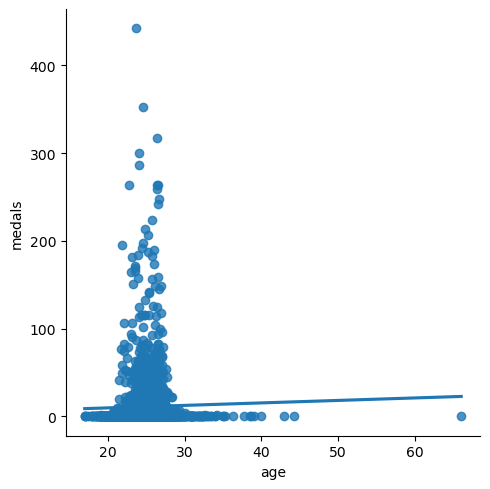

In [46]:
sns.lmplot(x='age', y='medals', data=dteams, fit_reg=True, ci=None) 


In this plot we are not seeing a clear linear correlation between age to medals. 

Between this plot and the athletes-to-medals plot, we can see there is a stronger correlation between athlete count and medals instead of age. However, it is to be noted that athletes between 20 and 30 are more likely to win medals.

C:\Users\allah\anaconda3\envs\fst_ml_envi\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


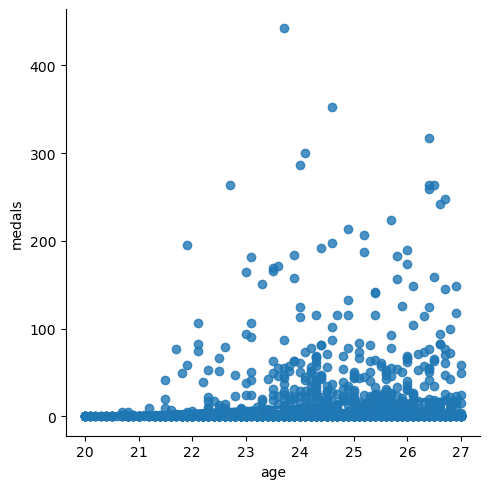

In [47]:
sns.lmplot(x='age', y='medals', data=dteams.query('age >= 20 and age <= 27'), fit_reg=True, ci=None)

This plot shows a positive linear relationship between age and medals between the ages of 20 and 27. It seems those who are closest to 25 (with a margin of error of two years both ways) win more medals than any other age group.

<Axes: ylabel='Frequency'>

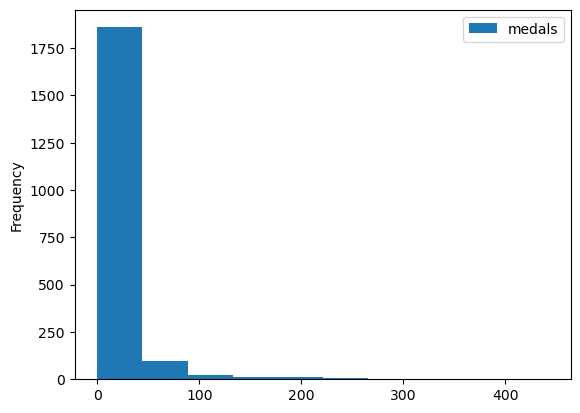

In [48]:
dteams.plot.hist(y="medals")

This histogram of the cleaned data gives us similar results as the first, just with the omission of a handful of rows.

### Data Training 

We do not have to split the data again because we are working with the same dataframe as the first model. The main difference in this model is the addition of "age" as a predictor.

In [49]:
# Update the predictors list to include "age"
predictors_ii = ["athletes", "prev_medals", "age"]
target = "medals"

In [50]:
# Fit the model with the updated predictors
reg.fit(train[predictors_ii], train["medals"])

LinearRegression()

In [51]:
predictions_ii = reg.predict(test[predictors_ii])

In [52]:
predictions_ii.shape

(405,)

In [53]:
predictions_ii

array([-9.63231334e-01, -1.17052512e+00, -1.49653250e+00, -1.62964525e+00,
        2.15227876e+00,  3.97081475e+00, -2.26672496e+00, -1.94949838e+00,
        2.41149947e-01, -4.88190647e-01, -1.71922860e+00, -1.29954092e+00,
        4.65547305e+01,  2.85391220e+01,  4.57473592e+00,  2.56786949e+00,
       -1.78063388e+00, -1.58101575e+00, -1.64247201e+00, -1.88809310e+00,
        1.46448360e+02,  1.20432343e+02,  6.29663313e+00,  3.74721748e+00,
        7.30893662e+00,  1.02473373e+01,  5.09783687e+00,  3.52090934e+00,
       -1.32771900e+00, -1.53496179e+00, -1.47098097e+00, -1.24318476e+00,
       -1.48380773e+00, -1.40442459e+00,  1.15628409e+01,  9.95873841e+00,
       -1.89319321e+00, -1.84456371e+00, -1.80103431e+00, -1.59379151e+00,
       -2.20794623e+00, -2.01605475e+00, -2.13108765e+00, -1.39417339e+00,
       -2.12093843e+00, -2.12093843e+00,  3.27257829e+01,  2.51087745e+01,
       -1.70897739e+00, -1.34554388e+00, -1.75760690e+00, -1.67385359e-01,
        7.81800040e+01,  

These values are not rounded, and some of these values are negative. Countries cant recieve a negative number of medals or partial values. So, we are going to manually correct/rescale our predictions. 

In [54]:
test["predictions_ii"] = predictions_ii


Let'stake a better look at our predictions.

In [55]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions,predictions_ii
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0,-0.963231
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0,-1.170525
24,ALB,Albania,2012,10,25.7,0.0,0,0.0,-1.496533
25,ALB,Albania,2016,6,23.7,0.0,0,0.0,-1.629645
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0,2.152279
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0,-1.506886
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0,-1.473557
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0,-1.588691
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0,1.312385


In [56]:
test.loc[test["predictions_ii"] < 0, "predictions_ii"] = 0

In [57]:
test["predictions_ii"] = test["predictions_ii"].round()

Check prediction values to make sure they are rounded.

In [58]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions,predictions_ii
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0,2.0
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0,1.0


We can already see a change in some countries predictions

### Accuracy Metric

We'll use MAE because it is a good default regression accuracy metric. 

In [59]:
error_ii = mean_absolute_error(test["medals"], test["predictions_ii"])
error_ii

3.2790123456790123

So, "predictions_ii"/Model 2 is more reliable, as it has a lower MAE, which suggests that it is providing better predictions. However, the difference between the two MAE values is relatively small, so both models might be considered relatively close in performance.

In [60]:
dteams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [61]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions,predictions_ii
2053,USA,United States,2012,689,26.7,317.0,248,285.0,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0,235.0


In [62]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions,predictions_ii
907,IND,India,2012,95,26.0,3.0,6,7.0,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0,12.0


The two examples above are used to help determine how far our error MAE is on a percentage basis and compare prediction models.

In [63]:
errors_ii = (test["medals"] - test["predictions_ii"]).abs()

In [64]:
errors_ii

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    1.0
2143    0.0
Length: 405, dtype: float64

The chart above is showing the difference in our predicted number vs the actual number of medals earned by each team.

In [65]:
error_by_team_ii = errors_ii.groupby(test["team"]).mean()

We'll use the code above to group each team and find the mean error by team.

In [66]:
error_by_team_ii

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.5
Length: 204, dtype: float64

Now, we can see how many medals we were off (on average) for each country. We can see a positive change in accuracy for some countries.

In [67]:
medals_by_team_ii = test["medals"].groupby(test["team"]).mean()

Use this code to see how many medals each country earned on average.

In [68]:
medals_by_team_ii

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

Next, we'll find the ratio between our errors.

In [69]:
error_ratio_ii =  error_by_team_ii / medals_by_team_ii 

In [70]:
error_ratio_ii

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

Time to fix inf and NaN values.

In [71]:
error_ratio_ii[~pd.isnull(error_ratio_ii)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.357143
         ...   
USA    0.128906
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 103, dtype: float64

In [72]:
error_ratio_ii = error_ratio_ii[np.isfinite(error_ratio_ii)]

In [73]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

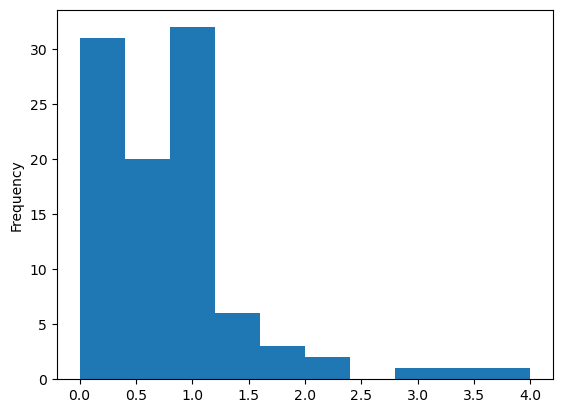

In [74]:
error_ratio_ii.plot.hist()

There are noticable changes in our graph. There are larger discrepancies but less overall.

In [75]:
error_ratio_ii.sort_values()

team
DOM    0.000000
FRA    0.022472
CAN    0.056452
NZL    0.063492
RUS    0.082353
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.000000
Length: 97, dtype: float64

The error ratio for this model has decreased our largest value by about 0.4 to produce a slightly more accurate prediction.

## Adding More Predictors
#### Model 3

Now, since the last addition to the predictors didn't make a large difference, we are going to add the number of events to the list of predictors. Since "events" was not included in the dataframe we were originally working with, we'll make a new one.

In [76]:
# Select working rows
ttteams = teams[["team", "country", "year", "athletes", "age", "events", "prev_medals", "medals"]]

In [77]:
ttteams

,team,country,year,athletes,age,events,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,8,0.0,0
1,AFG,Afghanistan,1968,5,23.2,5,0.0,0
2,AFG,Afghanistan,1972,8,29.0,8,0.0,0
3,AFG,Afghanistan,1980,11,23.6,11,0.0,0
4,AFG,Afghanistan,2004,5,18.6,5,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,19,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,11,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,15,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,8,4.0,0


In [78]:
ttteams.corr(numeric_only=True)["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
events         0.771330
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

Here, we can see a decent correlation between the events and medals column-- making it a viable option for working to make predictions.

C:\Users\allah\anaconda3\envs\fst_ml_envi\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


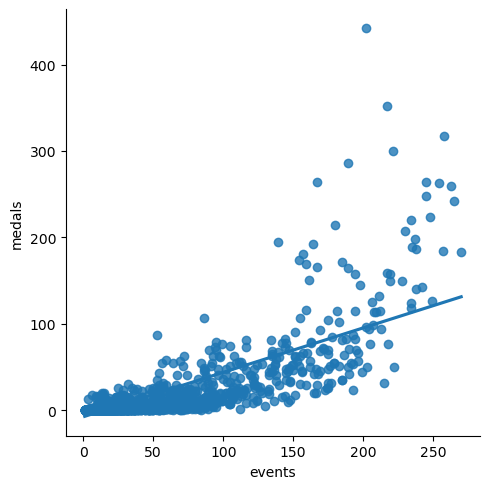

In [79]:
sns.lmplot(x='events', y='medals', data=ttteams, fit_reg=True, ci=None)

C:\Users\allah\anaconda3\envs\fst_ml_envi\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


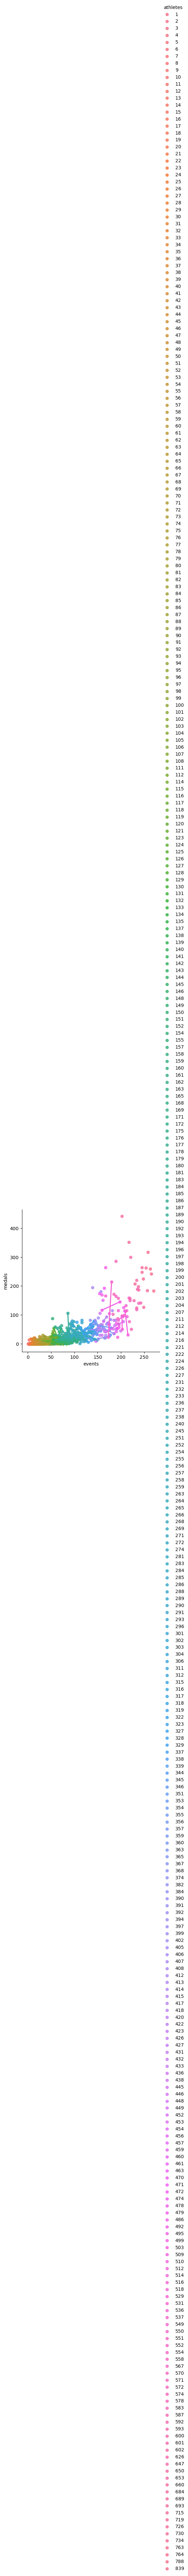

In [80]:
sns.lmplot(x='events', y='medals', data=ttteams, fit_reg=True, ci=None, hue='athletes')
plt.show()

This plot checks if there is a positive correlation between the number of events played, amount of players, and amount of medals won. It insinuates; that the more athletes + the more events = the more medals.


### Data Cleaning 
#### finding missing values

In [81]:
ttteams[ttteams.isnull().any(axis=1)].head(20)

,team,country,year,athletes,age,events,prev_medals,medals
19,ALB,Albania,1992,9,25.3,8,NaN,0
26,ALG,Algeria,1964,7,26.0,7,NaN,0
39,AND,Andorra,1976,3,28.3,2,NaN,0
50,ANG,Angola,1980,17,17.4,14,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,11,NaN,0
82,ARM,Armenia,1996,38,24.0,36,NaN,2
88,ARU,Aruba,1988,12,27.8,10,NaN,0
96,ASA,American Samoa,1988,6,27.0,6,NaN,0
131,AZE,Azerbaijan,1996,24,25.1,23,NaN,1
150,BAN,Bangladesh,1984,2,21.0,2,NaN,0


In [82]:
m3teams = ttteams.dropna()

In [83]:
m3teams.shape

(2014, 8)

### Data Training
#### split the data

Since the dataframe being used for the next predictions differs from that of the first two, we are going to create new training and testing models.

In [84]:
train_ii = m3teams[m3teams["year"] < 2012].copy()
test_ii = m3teams[m3teams["year"] >= 2012].copy()

In [85]:
# About 80% of the data
train_ii.shape

(1609, 8)

In [86]:
# About 20% of the data
test_ii.shape

(405, 8)

In [87]:
predictors_iii = ["athletes", "events", "prev_medals"]
target = "medals"

In [88]:
reg.fit(train_ii[predictors_iii], train_ii["medals"])


LinearRegression()

In [89]:
predictions_iii = reg.predict(test_ii[predictors_iii])


In [90]:
predictions_iii.shape


(405,)

In [91]:
predictions_iii

array([ 4.14631164e-01,  9.06609940e-01, -5.27318313e-01, -2.67293075e-01,
       -3.55746506e-01, -4.42279726e-01, -2.67293075e-01,  6.06927759e-02,
        4.87557366e+00,  2.78799182e+00,  6.06927759e-02,  8.24514001e-01,
        4.36914577e+01,  3.58107287e+01,  1.20375686e-01, -2.02142934e+00,
        6.06927759e-02, -3.53395373e-02,  6.06927759e-02,  6.06927759e-02,
        1.39190630e+02,  1.21794346e+02, -3.68205037e+00, -3.72001907e+00,
       -3.39355552e+00, -1.00797975e+00,  5.88164333e+00,  4.33966660e+00,
       -4.31286000e-01, -4.31286000e-01,  1.96614000e-01, -6.23350627e-01,
       -2.67293075e-01, -5.27318313e-01,  8.95148913e+00,  5.47198712e+00,
       -1.03300149e-01, -2.67293075e-01, -1.99332463e-01, -5.95278926e-01,
        3.88678627e-01,  3.88678627e-01, -5.95278926e-01,  1.00581687e-01,
        2.24685701e-01,  2.24685701e-01,  1.98497609e+01,  1.52869285e+01,
       -1.03300149e-01, -4.59357701e-01,  6.06927759e-02,  1.87431300e+00,
        7.02439257e+01,  

These values are not rounded, and some of these values are negative. 
Manually correct/rescale our predictions. 

In [92]:
test_ii["predictions_iii"] = predictions_iii


In [93]:
test_ii

,team,country,year,athletes,age,events,prev_medals,medals,predictions_iii
6,AFG,Afghanistan,2012,6,24.8,6,1.0,1,0.414631
7,AFG,Afghanistan,2016,3,24.7,3,1.0,0,0.906610
24,ALB,Albania,2012,10,25.7,9,0.0,0,-0.527318
25,ALB,Albania,2016,6,23.7,6,0.0,0,-0.267293
37,ALG,Algeria,2012,39,24.8,29,2.0,1,-0.355747
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,3,0.0,0,0.224686
2131,ZAM,Zambia,2012,7,22.6,7,0.0,0,-0.431286
2132,ZAM,Zambia,2016,7,24.1,7,0.0,0,-0.431286
2142,ZIM,Zimbabwe,2012,9,27.3,8,4.0,0,2.364372


In [94]:
test_ii.loc[test_ii["predictions_iii"] < 0, "predictions_iii"] = 0


In [95]:
test_ii["predictions_iii"] = test_ii["predictions_iii"].round()


Check prediction values to make sure they are rounded.

In [96]:
test_ii

,team,country,year,athletes,age,events,prev_medals,medals,predictions_iii
6,AFG,Afghanistan,2012,6,24.8,6,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,3,1.0,0,1.0
24,ALB,Albania,2012,10,25.7,9,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,6,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,29,2.0,1,0.0
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,7,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,7,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,8,4.0,0,2.0


## Accuracy Metric
We'll continue using MAE because it is a good default regression accuracy metric. 

In [97]:
error_iii = mean_absolute_error(test_ii["medals"], test_ii["predictions_iii"])
error_iii

3.269135802469136

"predictions_iii" is more reliable, as it has a lower MAE than "predictions_ii"; This suggests that it is providing better predictions. 

In [98]:
m3teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [99]:
test[test["team"] == "USA"]


,team,country,year,athletes,age,prev_medals,medals,predictions,predictions_ii
2053,USA,United States,2012,689,26.7,317.0,248,285.0,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0,235.0


In [100]:
test_ii[test_ii["team"] == "USA"]


,team,country,year,athletes,age,events,prev_medals,medals,predictions_iii
2053,USA,United States,2012,689,26.7,245,317.0,248,280.0
2054,USA,United States,2016,719,26.4,245,248.0,264,240.0


The code above is included to show the difference between predictions i, ii, and iii. Through the development of the models, we can see the predictions becoming more accurate.

In [101]:
test[test["team"] == "IND"]


,team,country,year,athletes,age,prev_medals,medals,predictions,predictions_ii
907,IND,India,2012,95,26.0,3.0,6,7.0,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0,12.0


In [102]:
test_ii[test_ii["team"] == "IND"]


,team,country,year,athletes,age,events,prev_medals,medals,predictions_iii
907,IND,India,2012,95,26.0,55,3.0,6,3.0
908,IND,India,2016,130,26.1,67,6.0,2,8.0


Through these models, we can see the predictions starting to becommore accurate than prior models.

In [103]:
errors_iii = (test_ii["medals"] - test_ii["predictions_iii"]).abs()


In [104]:
errors_iii

6       1.0
7       1.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    3.0
Length: 405, dtype: float64

We can see more errors in some cases and less in others.

In [105]:
error_by_team_iii = errors_iii.groupby(test_ii["team"]).mean()

We'll use the code above to group each team and find the mean error by team.

In [106]:
error_by_team_iii

team
AFG    1.0
ALB    0.0
ALG    1.5
AND    0.0
ANG    4.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    2.5
Length: 204, dtype: float64

In [107]:
medals_by_team_iii = test_ii["medals"].groupby(test_ii["team"]).mean()

We can use this code to see how many medals each country earned on average.

In [108]:
medals_by_team_iii

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

Next, we'll find the ratio between our errors.

In [109]:
error_ratio_iii =  error_by_team_iii / medals_by_team_iii 

In [110]:
error_ratio_iii

team
AFG    2.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    inf
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

Eliminate NaN and inf values.

In [111]:
error_ratio_iii = error_ratio_iii[np.isfinite(error_ratio_iii)]

In [112]:
error_ratio_iii

team
AFG    2.000000
ALG    1.000000
ARG    0.951220
ARM    1.000000
AUS    0.331633
         ...   
UKR    0.317073
USA    0.109375
UZB    1.000000
VEN    1.000000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

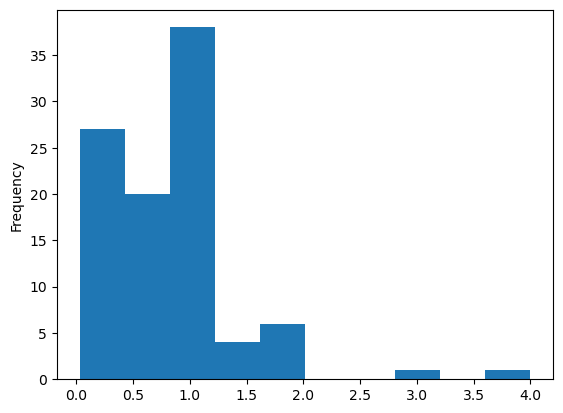

In [113]:
error_ratio_iii.plot.hist()


Our graph is continuing to change a lot, with less frequency in a lot of regions and more frequency in others.

In [114]:
error_ratio_iii.sort_values()


team
FRA    0.028090
RUS    0.050980
ETH    0.066667
NZL    0.095238
HUN    0.104167
         ...   
UGA    2.000000
GAB    2.000000
AFG    2.000000
BOT    3.000000
UAE    4.000000
Length: 97, dtype: float64

In [115]:
selected_teams = ['FRA', 'HKG', 'IND', 'NIG', 'USA', 'RUS']
columns_to_select = ['team', 'country', 'year', 'medals', 'predictions', 'predictions_ii']
filtered_teams = test[test['team'].isin(selected_teams)][columns_to_select]
print(filtered_teams)

     team        country  year  medals  predictions  predictions_ii
679   FRA         France  2012      82         86.0            86.0
680   FRA         France  2016      96         96.0            96.0
857   HKG      Hong Kong  2012       1          2.0             2.0
858   HKG      Hong Kong  2016       0          2.0             2.0
907   IND          India  2012       6          7.0             7.0
908   IND          India  2016       2         12.0            12.0
1451  NIG          Niger  2012       0          0.0             0.0
1452  NIG          Niger  2016       1          0.0             0.0
1666  RUS         Russia  2012     140        144.0           144.0
1667  RUS         Russia  2016     115        132.0           132.0
2053  USA  United States  2012     248        285.0           285.0
2054  USA  United States  2016     264        236.0           235.0


In [116]:
selected_teams = ['FRA', 'HKG', 'IND', 'NIG', 'USA', 'RUS']
columns_to_select = ['team', 'country', 'year', 'medals', 'predictions_iii']
filtered_teams_ii = test_ii[test_ii['team'].isin(selected_teams)][columns_to_select]
print(filtered_teams_ii)

     team        country  year  medals  predictions_iii
679   FRA         France  2012      82             78.0
680   FRA         France  2016      96             95.0
857   HKG      Hong Kong  2012       1              0.0
858   HKG      Hong Kong  2016       0              0.0
907   IND          India  2012       6              3.0
908   IND          India  2016       2              8.0
1451  NIG          Niger  2012       0              0.0
1452  NIG          Niger  2016       1              0.0
1666  RUS         Russia  2012     140            131.0
1667  RUS         Russia  2016     115            119.0
2053  USA  United States  2012     248            280.0
2054  USA  United States  2016     264            240.0


In the above error ratio graph and sorted value chart we can see a handful of new countries in the mix. The error ratio is beginning to increase for countries that did not perform well whereas predictions are becoming more accurate for countries that were exceptional and for those who have shown some level of performance. In general, the predictions are still becoming more accurate.


Now, let's see what happens if we throw one more predictor in the mix.

To do this we are going to use the original dataframe and utilize as many useful variables as possible. Instead of mentioning what we'll be using, I'll mention what we will omit: height and weight. Although, I'm sure they could be effective variables. 

## Adding More Predictors
#### Model 4

In [117]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [118]:
teams.corr(numeric_only=True)["medals"]


year            -0.021603
events           0.771330
athletes         0.840817
age              0.025096
height           0.141055
weight           0.090577
medals           1.000000
prev_medals      0.920048
prev_3_medals    0.918438
Name: medals, dtype: float64

After analyzing all columns in relation to medals, it appears that weight and height hold more correlation to medals than age. Due to the fact that they have such low correlational values, I will go ahead with omitting their involvement in the next set of predictions. However, they can be used (with potentially little to no effect) to further develop the prediction models.

C:\Users\allah\anaconda3\envs\fst_ml_envi\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


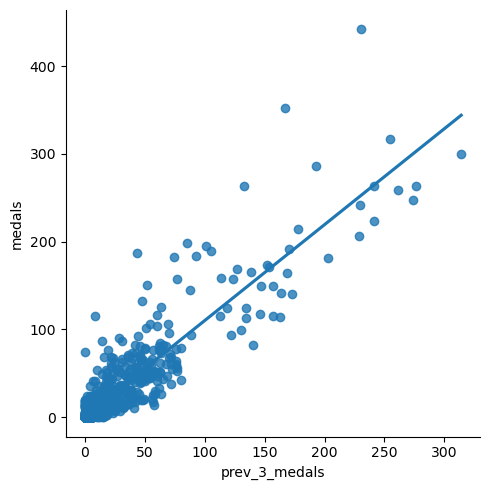

In [119]:
sns.lmplot(x='prev_3_medals',y='medals',data=teams,fit_reg=True, ci=None) 


This plot shows a rough positive correlation between previous achievement and current count of medals.

<Axes: ylabel='Frequency'>

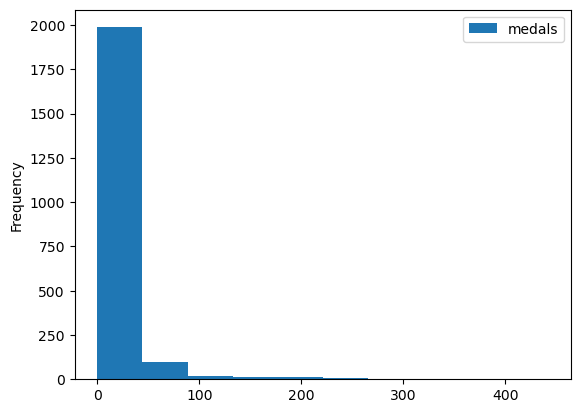

In [120]:
teams.plot.hist(y="medals")

### Data Cleaning 
#### finding missing values

In [121]:
teams[teams.isnull().any(axis=1)].head(20)


,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
19,ALB,Albania,1992,8,9,25.3,163.0,75.2,0,NaN,NaN
26,ALG,Algeria,1964,7,7,26.0,175.0,65.0,0,NaN,NaN
39,AND,Andorra,1976,2,3,28.3,174.7,78.0,0,NaN,NaN
50,ANG,Angola,1980,14,17,17.4,171.7,62.5,0,NaN,NaN
59,ANT,Antigua and Barbuda,1976,11,17,23.2,178.6,71.6,0,NaN,NaN
82,ARM,Armenia,1996,36,38,24.0,169.0,71.8,2,NaN,NaN
88,ARU,Aruba,1988,10,12,27.8,171.0,68.2,0,NaN,NaN
96,ASA,American Samoa,1988,6,6,27.0,179.5,97.2,0,NaN,NaN
131,AZE,Azerbaijan,1996,23,24,25.1,172.1,71.5,1,NaN,NaN
150,BAN,Bangladesh,1984,2,2,21.0,162.0,60.0,0,NaN,NaN


In [122]:
teams = teams.dropna()


In [123]:
teams.shape


(2014, 11)

### Data Training
#### split the data

In [124]:
train_iii= teams[teams["year"] < 2012].copy()
test_iii = teams[teams["year"] >= 2012].copy()

In [125]:
# About 80% of the data
train_iii.shape

(1609, 11)

In [126]:
# About 20% of the data
test_iii.shape

(405, 11)

In [127]:
# Create predictors
predictors_iv = ["athletes", "events", "prev_medals", "prev_3_medals"]
target = "medals"

In [128]:
# Fit the predictors
reg.fit(train_iii[predictors_iv], train_iii["medals"])


LinearRegression()

In [129]:
predictions_iv = reg.predict(test_iii[predictors_iv])


In [130]:
predictions_iv.shape


(405,)

In [131]:
predictions_iv

array([ 3.06767909e-01,  9.78244793e-01, -4.75149803e-01, -1.88528721e-01,
       -1.73237169e-01, -8.21046908e-01, -1.88528721e-01,  1.46381766e-01,
        4.53526656e+00,  2.59356471e+00,  1.46381766e-01,  8.41905124e-01,
        4.31579598e+01,  4.39980540e+01, -8.08541205e-01, -1.73715232e+00,
        1.46381766e-01,  2.72159291e-02,  1.46381766e-01,  1.46381766e-01,
        1.55817196e+02,  1.39424868e+02, -2.98829223e+00, -2.65641737e+00,
       -3.60412460e+00, -1.28489864e+00,  6.35345396e+00,  4.64229952e+00,
       -3.55983965e-01, -3.55983965e-01,  3.69793944e-01, -5.94315640e-01,
       -1.88528721e-01, -4.75149803e-01,  8.20095634e+00,  4.90184028e+00,
       -2.10734775e-02, -1.88528721e-01, -1.40239315e-01, -5.23439209e-01,
        4.81292254e-01,  4.81292254e-01, -5.23439209e-01,  1.23794742e-01,
        3.13837010e-01,  3.13837010e-01,  1.85635228e+01,  1.63993540e+01,
       -2.10734775e-02, -4.26860396e-01,  1.46381766e-01,  1.64952522e+00,
        6.60722319e+01,  

Correct and rescale predictions.

In [132]:
test_iii["predictions_iv"] = predictions_iv

In [133]:
test_iii

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions_iv
6,AFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.0,0.3,0.306768
7,AFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.0,0.7,0.978245
24,ALB,Albania,2012,9,10,25.7,176.8,80.2,0,0.0,0.0,-0.475150
25,ALB,Albania,2016,6,6,23.7,176.2,67.2,0,0.0,0.0,-0.188529
37,ALG,Algeria,2012,29,39,24.8,174.3,66.9,1,2.0,2.3,-0.173237
...,...,...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,19.3,169.7,65.7,0,0.0,0.0,0.313837
2131,ZAM,Zambia,2012,7,7,22.6,176.2,74.2,0,0.0,0.0,-0.355984
2132,ZAM,Zambia,2016,7,7,24.1,175.2,67.5,0,0.0,0.0,-0.355984
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,2.138548


In [134]:
test_iii.loc[test_iii["predictions_iv"] < 0, "predictions_iv"] = 0


In [135]:
test_iii["predictions_iv"] = test_iii["predictions_iv"].round()


Check prediction values to make sure they are rounded.

In [136]:
test_iii

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions_iv
6,AFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.0,0.3,0.0
7,AFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.0,0.7,1.0
24,ALB,Albania,2012,9,10,25.7,176.8,80.2,0,0.0,0.0,0.0
25,ALB,Albania,2016,6,6,23.7,176.2,67.2,0,0.0,0.0,0.0
37,ALG,Algeria,2012,29,39,24.8,174.3,66.9,1,2.0,2.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,19.3,169.7,65.7,0,0.0,0.0,0.0
2131,ZAM,Zambia,2012,7,7,22.6,176.2,74.2,0,0.0,0.0,0.0
2132,ZAM,Zambia,2016,7,7,24.1,175.2,67.5,0,0.0,0.0,0.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,2.0


## Accuracy Metric

We'll continue using MAE because it is a good default regression accuracy metric.

In [137]:
error_iv = mean_absolute_error(test_iii["medals"], test_iii["predictions_iv"])
error_iv

3.4024691358024692

In [138]:
teams.describe()["medals"]


count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

Below, I am including previous tests to compare predictions.

In [139]:
test[test["team"] == "USA"]


,team,country,year,athletes,age,prev_medals,medals,predictions,predictions_ii
2053,USA,United States,2012,689,26.7,317.0,248,285.0,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0,235.0


In [140]:
test_ii[test_ii["team"] == "USA"]


,team,country,year,athletes,age,events,prev_medals,medals,predictions_iii
2053,USA,United States,2012,689,26.7,245,317.0,248,280.0
2054,USA,United States,2016,719,26.4,245,248.0,264,240.0


In [141]:
test_iii[test_iii["team"] == "USA"]


,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions_iv
2053,USA,United States,2012,245,689,26.7,178.3,74.7,248,317.0,274.0,288.0
2054,USA,United States,2016,245,719,26.4,178.0,73.8,264,248.0,276.0,270.0


Here, we can see Model 4 is the most accurate in determining how many medals USA will win with a .01% error of difference.

In [142]:
test[test["team"] == "IND"]


,team,country,year,athletes,age,prev_medals,medals,predictions,predictions_ii
907,IND,India,2012,95,26.0,3.0,6,7.0,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0,12.0


In [143]:
test_ii[test_ii["team"] == "IND"]


,team,country,year,athletes,age,events,prev_medals,medals,predictions_iii
907,IND,India,2012,95,26.0,55,3.0,6,3.0
908,IND,India,2016,130,26.1,67,6.0,2,8.0


In [144]:
test_iii[test_iii["team"] == "IND"]


,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions_iv
907,IND,India,2012,55,95,26.0,174.2,72.7,6,3.0,1.7,2.0
908,IND,India,2016,67,130,26.1,170.0,66.3,2,6.0,3.3,7.0


So, Model 4 proves to be more accurate for both USA and IND. However, we can notice a greater frequency of errors for countries with less consistent or poor performance. 

In [145]:
errors_iv = (test_iii["medals"] -test_iii["predictions_iv"]).abs()


In [146]:
errors_iv

6       1.0
7       1.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    3.0
Length: 405, dtype: float64

In [147]:
error_by_team_iv = errors_iv.groupby(test_iii["team"]).mean()

We'll use the code above to group each team and find the mean error by team.

In [148]:
error_by_team_iv

team
AFG    1.0
ALB    0.0
ALG    1.5
AND    0.0
ANG    4.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    2.5
Length: 204, dtype: float64

Now, we can see how many medals we were off (on average) for each country.

In [149]:
medals_by_team_iv = test_iii["medals"].groupby(test_iii["team"]).mean()

We can use this code to see how many medals each country earned on average.

In [150]:
medals_by_team_iv

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [151]:
error_ratio_iv =  error_by_team_iv / medals_by_team_iv 

In [152]:
error_ratio_iv

team
AFG    2.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    inf
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

Time to rid NaN and inf values!

In [153]:
error_ratio_iv[~pd.isnull(error_ratio_iv)]

team
AFG    2.000000
ALG    1.000000
ANG         inf
ANT         inf
ARG    1.121951
         ...   
USA    0.089844
UZB    1.000000
VEN    1.000000
VIE    1.000000
ZIM         inf
Length: 114, dtype: float64

In [154]:
error_ratio_iv = error_ratio_iv[np.isfinite(error_ratio_iv)]

In [155]:
error_ratio_iv

team
AFG    2.000000
ALG    1.000000
ARG    1.121951
ARM    1.000000
AUS    0.505102
         ...   
UKR    0.365854
USA    0.089844
UZB    1.000000
VEN    1.000000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

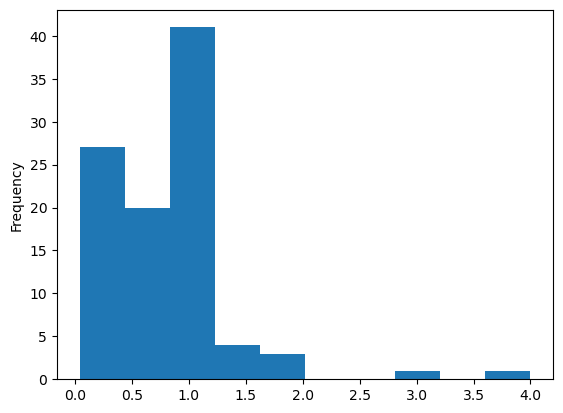

In [156]:
error_ratio_iv.plot.hist()


This plot shows that there is a higher frequency of low error ratios. Yet, we see dramatically less frequency of large-margin errors. This indicates signs of a productive predictive model and the predictions are close to the actual values for the majority of the data points.

In [157]:
error_ratio_iv.sort_values()


team
FRA    0.039326
ITA    0.064286
ETH    0.066667
USA    0.089844
HUN    0.104167
         ...   
GAB    2.000000
UGA    2.000000
AFG    2.000000
BOT    3.000000
UAE    4.000000
Length: 97, dtype: float64

Let's see how this model does with the randomly selected countries.

In [158]:
selected_teams = ['FRA', 'NIG', 'USA', 'RUS', 'HKG']
columns_to_select = ['team', 'country', 'year', 'medals', 'predictions', 'predictions_ii']
filtered_teams = test[test['team'].isin(selected_teams)][columns_to_select]
print(filtered_teams)

     team        country  year  medals  predictions  predictions_ii
679   FRA         France  2012      82         86.0            86.0
680   FRA         France  2016      96         96.0            96.0
857   HKG      Hong Kong  2012       1          2.0             2.0
858   HKG      Hong Kong  2016       0          2.0             2.0
1451  NIG          Niger  2012       0          0.0             0.0
1452  NIG          Niger  2016       1          0.0             0.0
1666  RUS         Russia  2012     140        144.0           144.0
1667  RUS         Russia  2016     115        132.0           132.0
2053  USA  United States  2012     248        285.0           285.0
2054  USA  United States  2016     264        236.0           235.0


In [159]:
selected_teams = ['FRA', 'NIG', 'USA', 'RUS', 'HKG']
columns_to_select = ['team', 'country', 'year', 'medals', 'predictions_iii']
filtered_teams_ii = test_ii[test_ii['team'].isin(selected_teams)][columns_to_select]
print(filtered_teams_ii)


     team        country  year  medals  predictions_iii
679   FRA         France  2012      82             78.0
680   FRA         France  2016      96             95.0
857   HKG      Hong Kong  2012       1              0.0
858   HKG      Hong Kong  2016       0              0.0
1451  NIG          Niger  2012       0              0.0
1452  NIG          Niger  2016       1              0.0
1666  RUS         Russia  2012     140            131.0
1667  RUS         Russia  2016     115            119.0
2053  USA  United States  2012     248            280.0
2054  USA  United States  2016     264            240.0


In [160]:
selected_teams = ['FRA', 'NIG', 'USA', 'RUS', 'HKG']
columns_to_select = ['team', 'country', 'year', 'medals', 'predictions_iv']
filtered_teams_iv = test_iii[test_iii['team'].isin(selected_teams)][columns_to_select]
print(filtered_teams_iv)


     team        country  year  medals  predictions_iv
679   FRA         France  2012      82            77.0
680   FRA         France  2016      96            94.0
857   HKG      Hong Kong  2012       1             0.0
858   HKG      Hong Kong  2016       0             0.0
1451  NIG          Niger  2012       0             0.0
1452  NIG          Niger  2016       1             0.0
1666  RUS         Russia  2012     140           153.0
1667  RUS         Russia  2016     115           137.0
2053  USA  United States  2012     248           288.0
2054  USA  United States  2016     264           270.0


In [161]:
# I am going to analyze random rows to compare error ratios.
selected_teams = ['FRA', 'HKG', 'IND', 'NIG', 'USA', 'RUS']

# Error Ratios I
error_ratio_i = error_ratio[error_ratio.index.isin(selected_teams)].sort_values()

# Error Ratios II
error_ratio_ii = error_ratio_ii[error_ratio_ii.index.isin(selected_teams)].sort_values()

# Error Ratios III
error_ratio_iii = error_ratio_iii[error_ratio_iii.index.isin(selected_teams)].sort_values()

# Error Ratios IV
error_ratio_iv = error_ratio_iv[error_ratio_iv.index.isin(selected_teams)].sort_values()

print("Error Ratios I (ascending order):")
print(error_ratio_i)

print("\nError Ratios II (ascending order):")
print(error_ratio_ii)

print("\nError Ratios III (ascending order):")
print(error_ratio_iii)

print("\nError Ratios IV (ascending order):")
print(error_ratio_iv)


Error Ratios I (ascending order):
team
FRA    0.022472
RUS    0.082353
USA    0.126953
NIG    1.000000
IND    1.375000
HKG    3.000000
dtype: float64

Error Ratios II (ascending order):
team
FRA    0.022472
RUS    0.082353
USA    0.128906
NIG    1.000000
IND    1.375000
HKG    3.000000
dtype: float64

Error Ratios III (ascending order):
team
FRA    0.028090
RUS    0.050980
USA    0.109375
HKG    1.000000
NIG    1.000000
IND    1.125000
dtype: float64

Error Ratios IV (ascending order):
team
FRA    0.039326
USA    0.089844
RUS    0.137255
HKG    1.000000
NIG    1.000000
IND    1.125000
dtype: float64


## Observations
 these models are effective for countries that consistently perform well in the Olympics although there may be small variations in predictions across the models created.  In the case of the United States (USA), Russia (RUS), and France (FRA), all four models appear to make relatively consistent predictions across different years with models 3 and 4 being the most accurate. Some countries with fewer medals exhibit larger discrepancies in predictions due to statistical anomalies. For example, countries such as Niger (NIG) and Hong Kong (HKG) exhibit larger discrepancies in consequence to low results, limited historical success in the Olympics, and small changes in those results, having a substantial impact- making it challenging to produce accurate predictions. 

## Next Steps
In conclusion,  the choice of the predictive model can significantly impact the predictions for both high-medal and low-medal countries. Countries with a consistent history of the Olympics tend to have similar predictions across models, while less consistent countries show varying predictions, which can be challenging to improve given the nature of their historical data. When taking the calculated Mean Absolute Errors (MAEs) for Model 3 and Model 4 into consideration, it does appear that Model 3 ("predictions_iii") has a slightly lower MAE, indicating better prediction accuracy. However, it's essential to consider other factors, including the nature of the errors, statistical anomalies, and the distribution of error ratios for specific countries. Given these observations, Model 4 seems to perform slightly better overall, but it might make overpredictions for high-scoring countries. If avoiding overpredictions for high-scoring countries is essential, you might want to investigate Model 3 further, find a happy medium between the two models with an average, or explore ways to address the anomalies in Model 4. The choice between Model 3 and Model 4 depends on the specific goals and priorities of your project. Additionally, more variables/predictors could be included in calculations or different Model selection, and perhaps a completely different machine learning model. Nonetheless fine-tuning is crucial in striking predictive accuracy.


# Future Olympic Predictions
This prediction is not going to be the most accurate because it does not include the 2018-2022 Olympic data, however, I want to see if we can make a semi-accurate prediction of what 2024 results should look like for "USA"  utilizing the strengths and weaknesses of models 3 and 4.


In [162]:
test_ii[test_ii["team"] == "USA"]


,team,country,year,athletes,age,events,prev_medals,medals,predictions_iii
2053,USA,United States,2012,689,26.7,245,317.0,248,280.0
2054,USA,United States,2016,719,26.4,245,248.0,264,240.0


In [163]:
test_iii[test_iii["team"] == "USA"]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions_iv
2053,USA,United States,2012,245,689,26.7,178.3,74.7,248,317.0,274.0,288.0
2054,USA,United States,2016,245,719,26.4,178.0,73.8,264,248.0,276.0,270.0


* To prevent from encountering an error that suggests that feature names of training models aren't present, we must run the training once more.

In [164]:
predictors_iii = ["athletes", "events", "prev_medals"]


In [165]:
reg.fit(train_ii[predictors_iii], train_ii["medals"])


LinearRegression()

In [166]:
predictions_iii = reg.predict(test_ii[predictors_iii])


In [167]:
# Model 3 2024 Predictions
# Create a DataFrame for 2024
predictions_2024_m3 = pd.DataFrame({
    'country_code': ['USA'],  # Add the 3-letter country code
    'country': ['United States'],  # Add the name of the country
    'athletes': [719],  # Use the number of athletes for 2024
    'events': [245],  # Use the expected number of events for 2024
    'prev_medals': [264.0]  # Use the previous medals for 2016 or leave as 0 if not available
})

# Use the trained Model 3 to make predictions for medals in 2024
predictions_2024_m3['predicted medals'] = reg.predict(predictions_2024_m3[predictors_iii])

# Round the predicted values to the nearest integer
predictions_2024_m3['predicted medals'] = predictions_2024_m3['predicted medals'].round()

# Add the year column for 2024
predictions_2024_m3['year'] = 2024

# Print the predicted medals for 2024 using Model 3
print("Predicted Medals for 2024 (Model 3):")
print(predictions_2024_m3)


Predicted Medals for 2024 (Model 3):
  country_code        country  athletes  events  prev_medals  \
0          USA  United States       719     245        264.0   

   predicted medals  year  
0             251.0  2024  


In [168]:
# Model 3 2028 Predictions
# Create a DataFrame for 2028
predictions_2028_m3 = pd.DataFrame({
        'country_code': ['USA'],  # Add the 3-letter country code
    'country': ['United States'],  # Add the name of the country
    'athletes': [719],  # Use the number of athletes for 2028
    'age': [26.4],  # Use the expected age for 2028
    'events': [245],  # Use the expected number of events for 2028
    'prev_medals': [247]  # Use the predicted medals for 2024 
})

# Use the trained model to make predictions for medals in 2028
predictions_2028_m3['predicted medals'] = reg.predict(predictions_2028_m3[predictors_iii])

# Round the predicted values to the nearest integer
predictions_2028_m3['predicted medals'] = predictions_2028_m3['predicted medals'].round()

# Add the year column for 2024
predictions_2028_m3['year'] = 2028

# Print the predicted medals for 2024
print("Predicted Medals for 2028 (Model 3):")
print(predictions_2028_m3)


Predicted Medals for 2028 (Model 3):
  country_code        country  athletes   age  events  prev_medals  \
0          USA  United States       719  26.4     245          247   

   predicted medals  year  
0             239.0  2028  


* To prevent from encountering an error that suggests that feature names of training models aren't present, we must run the training once more.

In [169]:
predictors_iv = ["athletes", "events", "prev_medals", "prev_3_medals"]

In [170]:
reg.fit(train_iii[predictors_iv], train_iii["medals"])


LinearRegression()

In [171]:
predictions_iv = reg.predict(test_iii[predictors_iv])


In [172]:
# Model 4 2024 Predictions
# Create a DataFrame for 2024
predictions_2024_m4 = pd.DataFrame({
    'country': ['United States'],  # Add the name of the country
    'country_code': ['USA'],  # Add the 3-letter country code
    'athletes': [719],  # Use the number of athletes for 2024
    'age': [26.4],  # Use the expected age for 2024
    'events': [245],  # Use the expected number of events for 2024
    'prev_medals': [264.0],  # Use the previous medals for 2016 or leave as 0 if not available
    'prev_3_medals': [276]  # Use the medals from the last three Olympics or leave as 0 if not available
})

# Use the trained Model 4 to make predictions for medals in 2024
predictions_2024_m4['predicted medals'] = reg.predict(predictions_2024_m4[predictors_iv])

# Round the predicted values to the nearest integer
predictions_2024_m4['predicted medals'] = predictions_2024_m4['predicted medals'].round()

# Add the year column for 2024
predictions_2024_m4['year'] = 2024

# Print the predicted medals for 2024 using Model 4
print("Predicted Medals for 2024 (Model 4):")
print(predictions_2024_m4)


Predicted Medals for 2024 (Model 4):
         country country_code  athletes   age  events  prev_medals  \
0  United States          USA       719  26.4     245        264.0   

   prev_3_medals  predicted medals  year  
0            276             276.0  2024  


In [173]:
# Model 4 2028 Predictions
# Create a DataFrame for 2028
predictions_2028_m4 = pd.DataFrame({
    'country': ['United States'],  # Add the name of the country
    'country_code': ['USA'],  # Add the 3-letter country code
    'athletes': [719],  # Use the number of athletes for 2028
    'age': [26.4],  # Use the expected age for 2028
    'events': [245],  # Use the expected number of events for 2028
    'prev_medals': [276],  # Use the previous medals for 2024 or leave as 0 if not available
    'prev_3_medals': [276]  # Use the medals from the last three Olympics or leave as 0 if not available
})

# Use the trained Model 4 to make predictions for medals in 2028
predictions_2028_m4['predicted medals'] = reg.predict(predictions_2028_m4[predictors_iv])

# Round the predicted values to the nearest integer
predictions_2028_m4['predicted medals'] = predictions_2028_m4['predicted medals'].round()

# Add the year column for 2028
predictions_2028_m4['year'] = 2028

# Print the predicted medals for 2028 using Model 4
print("Predicted Medals for 2028 (Model 4):")
print(predictions_2028_m4)


Predicted Medals for 2028 (Model 4):
         country country_code  athletes   age  events  prev_medals  \
0  United States          USA       719  26.4     245          276   

   prev_3_medals  predicted medals  year  
0            276             280.0  2028  
